In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [54]:
df=pd.read_csv("../data/processed/me_census_data_merged.csv")

/var/folders/0x/ztknfswx6c56lvcl29wrvt6c0000gn/T/ipykernel_40382/1544710319.py:1: DtypeWarning: Columns (25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../data/processed/me_census_data_merged.csv")


In [55]:
display(df.shape)
display(df.info())
display(df.head())

(51791, 73)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51791 entries, 0 to 51790
Data columns (total 73 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             51791 non-null  object 
 1   Date of Incident        50525 non-null  object 
 2   Date of Death           51791 non-null  object 
 3   Age                     51631 non-null  float64
 4   Gender                  51685 non-null  object 
 5   Race                    51575 non-null  object 
 6   Latino                  51791 non-null  bool   
 7   Manner of Death         51550 non-null  object 
 8   Primary Cause           51777 non-null  object 
 9   Primary Cause Line A    51777 non-null  object 
 10  Primary Cause Line B    18404 non-null  object 
 11  Primary Cause Line C    2690 non-null   object 
 12  Secondary Cause         22382 non-null  object 
 13  Gun Related             51548 non-null  object 
 14  Opioid Related          51548 non-null

None

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line A,...,Age_65plus,Pct_Black,Pct_Hispanic,Pct_Asian,Pct_WhiteNonHisp,Pct_BelowPoverty,Pct_BachelorsPlus,Pct_Unemployed,Pct_Uninsured,TRACT
0,ME2025-02283,04/21/2023 02:08:00 PM,07/25/2023 12:00:00 AM,42.0,Male,Black,False,ACCIDENT,COMPLICATIONS OF DROWNING,COMPLICATIONS OF DROWNING,...,64.0,54.358726,36.891477,2.846515,5.369562,31.635129,5.029921,16.167419,0.727802,1.703123e+10
1,ME2025-01581,03/10/2025 12:00:00 AM,05/03/2023 11:36:00 PM,84.0,Male,Black,False,NATURAL,MALIGNANT NEOPLASM OF THE URINARY BLADDER,MALIGNANT NEOPLASM OF THE URINARY BLADDER,...,169.0,58.768702,18.248712,0.000000,16.458180,28.427766,8.413049,4.727475,3.752759,1.703183e+10
2,ME2025-01577,03/06/2022 08:11:00 PM,03/06/2022 07:20:00 PM,71.0,Male,White,True,NATURAL,CHRONIC ETHANOLISM,CHRONIC ETHANOLISM,...,45.0,4.439252,56.464174,6.795171,29.848131,11.351246,19.704050,4.703947,0.000000,1.703131e+10
3,ME2024-00980,11/30/2023 02:23:00 PM,12/01/2023 07:52:00 AM,87.0,Female,Asian,False,NATURAL,SEPSIS. BRONCHOPNEUMONIA,SEPSIS,...,219.0,0.296067,8.430847,8.487241,78.415339,6.104610,25.137459,2.698781,1.156069,1.703112e+10
4,ME2024-00837,12/19/2023 02:42:00 PM,12/27/2023 11:03:00 PM,84.0,Male,Black,False,ACCIDENT,THERMAL AND INHALATION INJURIES. RESIDENTIAL F...,THERMAL AND INHALATION INJURIES,...,199.0,11.299518,13.799152,15.553282,54.904254,18.871510,25.405642,4.680743,1.359450,1.703103e+10


In [56]:
df.rename(columns={"contanins_fentanyl": "contains_fentanyl"}, inplace=True)
drug_cols = [col for col in df.columns if "contain" in col.lower()]
df[drug_cols].mean().sort_values(ascending=False)

contains_fentanyl    0.146184
contains_cocaine     0.084378
contains_heroin      0.053098
dtype: float64

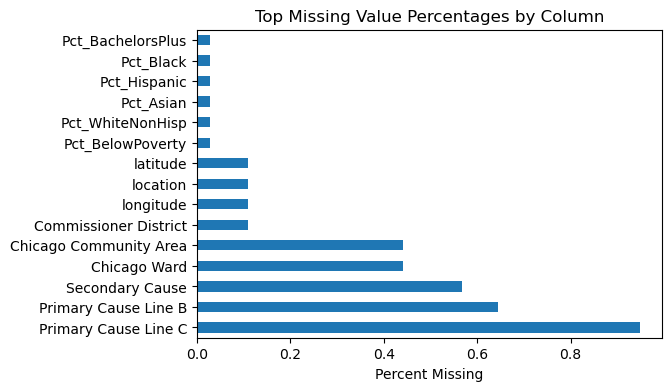


Columns with multiple data types:
⚠️ Date of Incident
⚠️ Gender
⚠️ Race
⚠️ Manner of Death
⚠️ Primary Cause
⚠️ Primary Cause Line A
⚠️ Primary Cause Line B
⚠️ Primary Cause Line C
⚠️ Secondary Cause
⚠️ Gun Related
⚠️ Opioid Related
⚠️ Incident Address
⚠️ Incident City
⚠️ location
⚠️ Residence City
⚠️ Residence Zip
⚠️ Chicago Community Area
⚠️ COVID Related
⚠️ NAME

Duplicate rows: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Case Number,51791,51791,ME2025-02283,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Incident,50525,43066,01/11/2022 12:00:00 AM,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Death,51791,50757,04/19/2019 10:45:00 AM,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,51631.0,NaN,NaN,NaN,58.025237,21.144543,0.0,43.0,60.0,74.0,109.0
Gender,51685,3,Male,35545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Pct_BelowPoverty,50300.0,NaN,NaN,NaN,17.559918,12.630765,0.937245,7.698581,13.787801,23.648482,56.278086
Pct_BachelorsPlus,50300.0,NaN,NaN,NaN,15.963818,9.754412,3.576678,7.956648,14.38378,22.07672,45.208791
Pct_Unemployed,50300.0,NaN,NaN,NaN,9.034293,6.517944,0.478088,4.064801,6.505102,13.217279,33.022254
Pct_Uninsured,50300.0,NaN,NaN,NaN,1.023866,1.326784,0.0,0.0,0.43239,1.35945,6.34375


In [57]:
# Missing values
missing = df.isna().mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
missing.head(15).plot(kind='barh')
plt.title("Top Missing Value Percentages by Column")
plt.xlabel("Percent Missing")
plt.show()

# Mixed types or unusual entries
print("\nColumns with multiple data types:")
for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(f"⚠️ {col}")

# Duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Descriptive stats
display(df.describe(include='all').T)

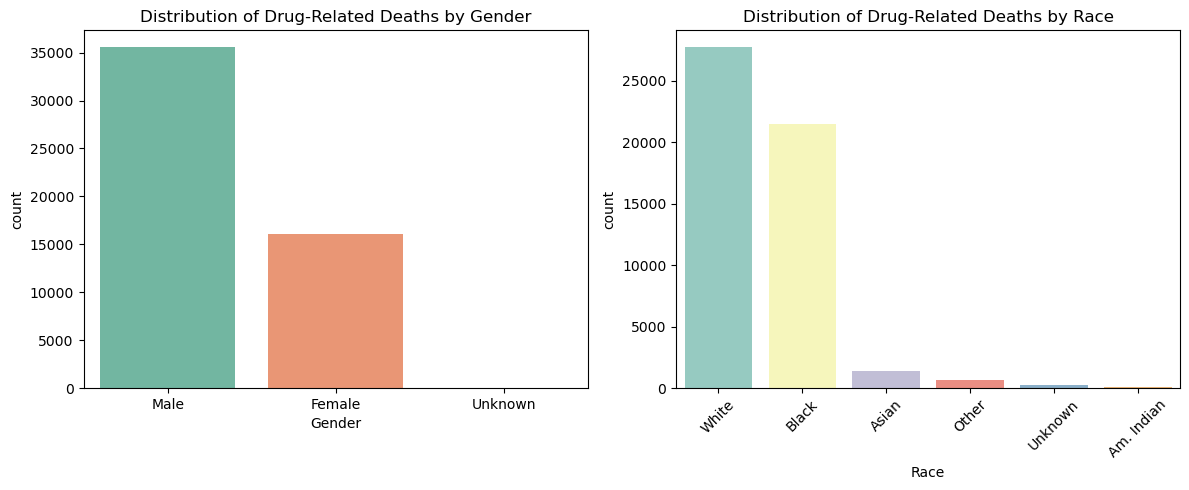

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df, x="Gender", ax=axes[0], palette="Set2")
axes[0].set_title("Distribution of Drug-Related Deaths by Gender")

sns.countplot(data=df, x="Race", ax=axes[1], order=df["Race"].value_counts().index, palette="Set3")
axes[1].set_title("Distribution of Drug-Related Deaths by Race")
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)
plt.tight_layout()
plt.show()


/Users/rithikkasouresh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


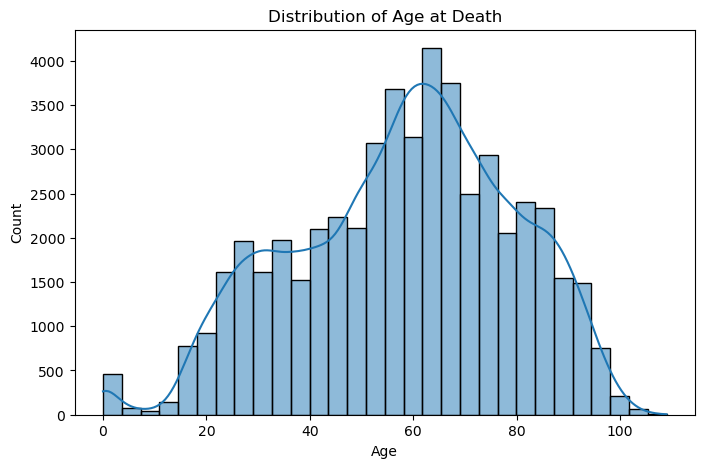

In [59]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribution of Age at Death")
plt.xlabel("Age")
plt.show()


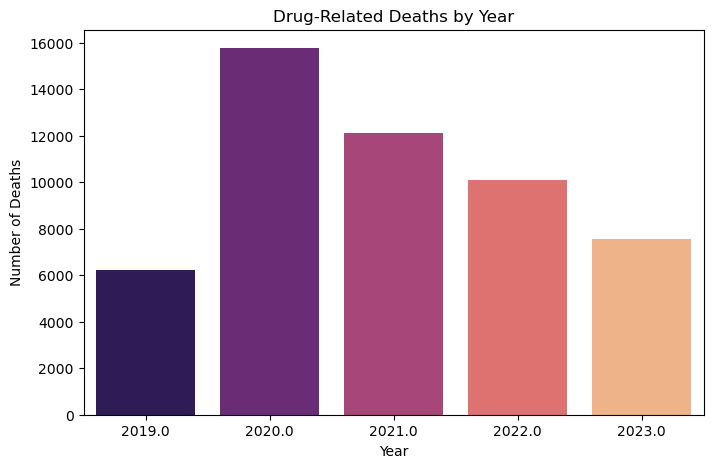

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Year_of_Death", palette="magma")
plt.title("Drug-Related Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()


In [61]:
drug_cols = [col for col in df.columns if "contain" in col.lower()]
df[drug_cols].mean().sort_values(ascending=False)


contains_fentanyl    0.146184
contains_cocaine     0.084378
contains_heroin      0.053098
dtype: float64

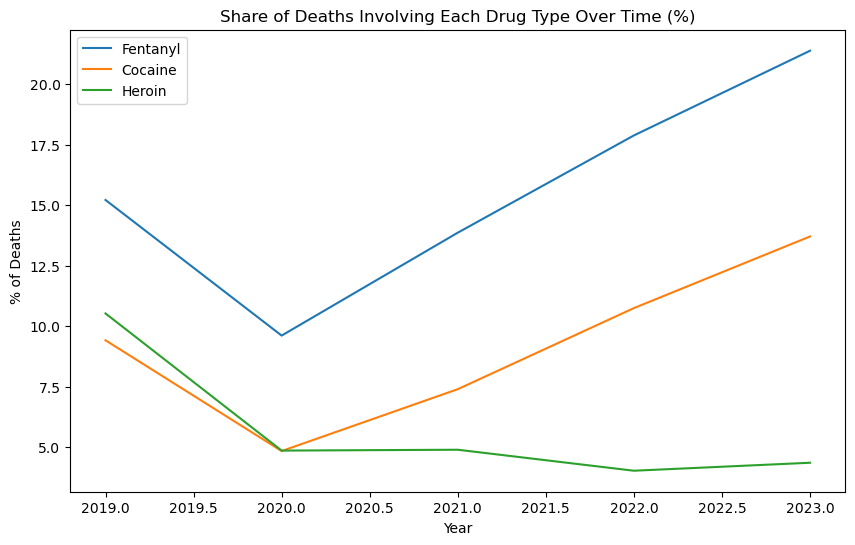

In [62]:
plt.figure(figsize=(10,6))
for drug in drug_cols:
    yearly = df.groupby("Year_of_Death")[drug].mean() * 100
    plt.plot(yearly.index, yearly.values, label=drug.replace("contains_", "").capitalize())

plt.legend()
plt.title("Share of Deaths Involving Each Drug Type Over Time (%)")
plt.xlabel("Year")
plt.ylabel("% of Deaths")
plt.show()


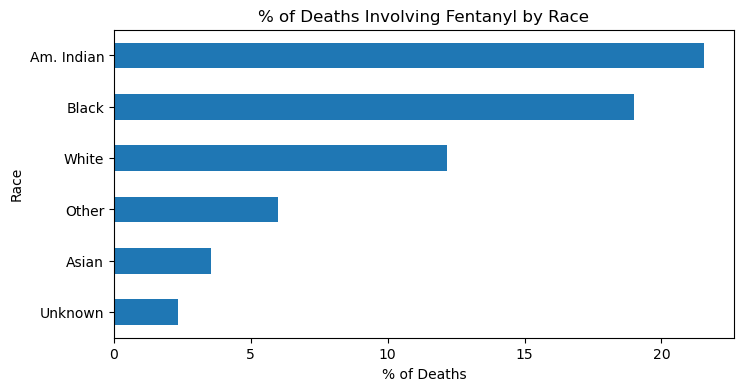

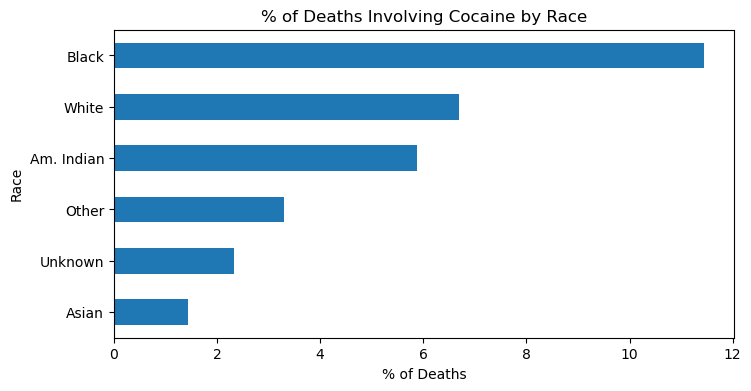

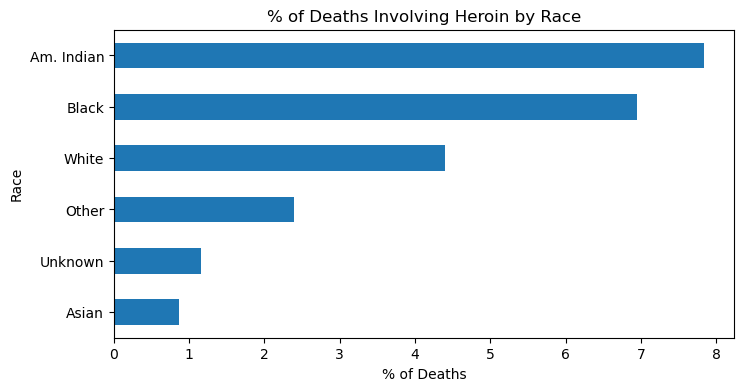

In [63]:
for drug in drug_cols:
    ctab = pd.crosstab(df["Race"], df[drug], normalize='index') * 100
    ctab[True].sort_values().plot(kind='barh', figsize=(8,4))
    plt.title(f"% of Deaths Involving {drug.replace('contains_', '').capitalize()} by Race")
    plt.xlabel("% of Deaths")
    plt.show()

/Users/rithikkasouresh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Fentanyl Involvement Rate')

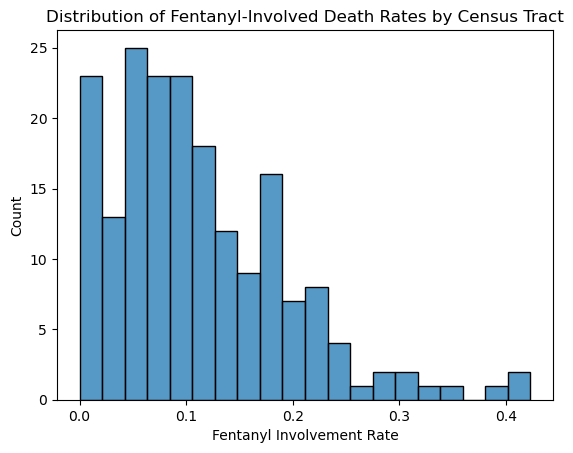

In [64]:
tract_stats = (
    df.groupby("TRACT")["contains_fentanyl"]
    .mean()
    .reset_index()
    .rename(columns={"contains_fentanyl": "fentanyl_rate"})  # Fixed the typo here
)
sns.histplot(tract_stats["fentanyl_rate"], bins=20)
plt.title("Distribution of Fentanyl-Involved Death Rates by Census Tract")
plt.xlabel("Fentanyl Involvement Rate")

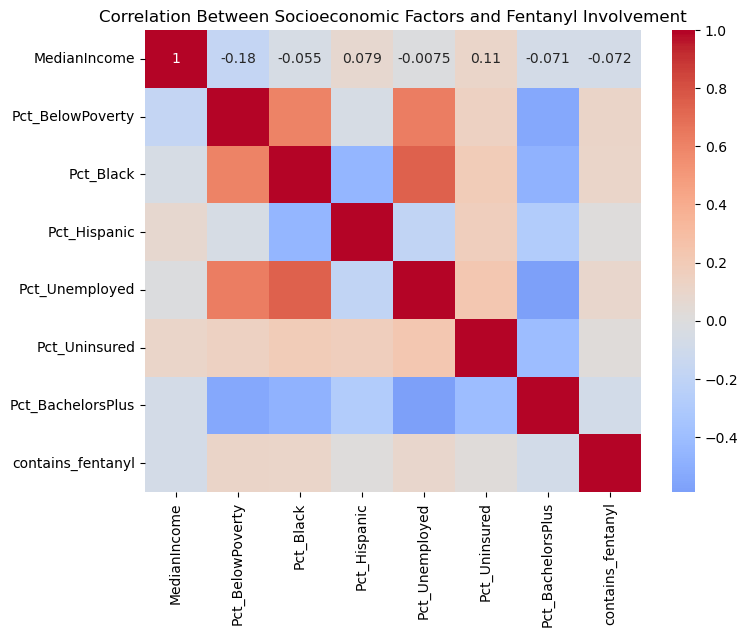

In [65]:
cols = [
    "MedianIncome", "Pct_BelowPoverty", "Pct_Black",
    "Pct_Hispanic", "Pct_Unemployed", "Pct_Uninsured", "Pct_BachelorsPlus"
]
corr = df[cols + ["contains_fentanyl"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Between Socioeconomic Factors and Fentanyl Involvement")
plt.show()


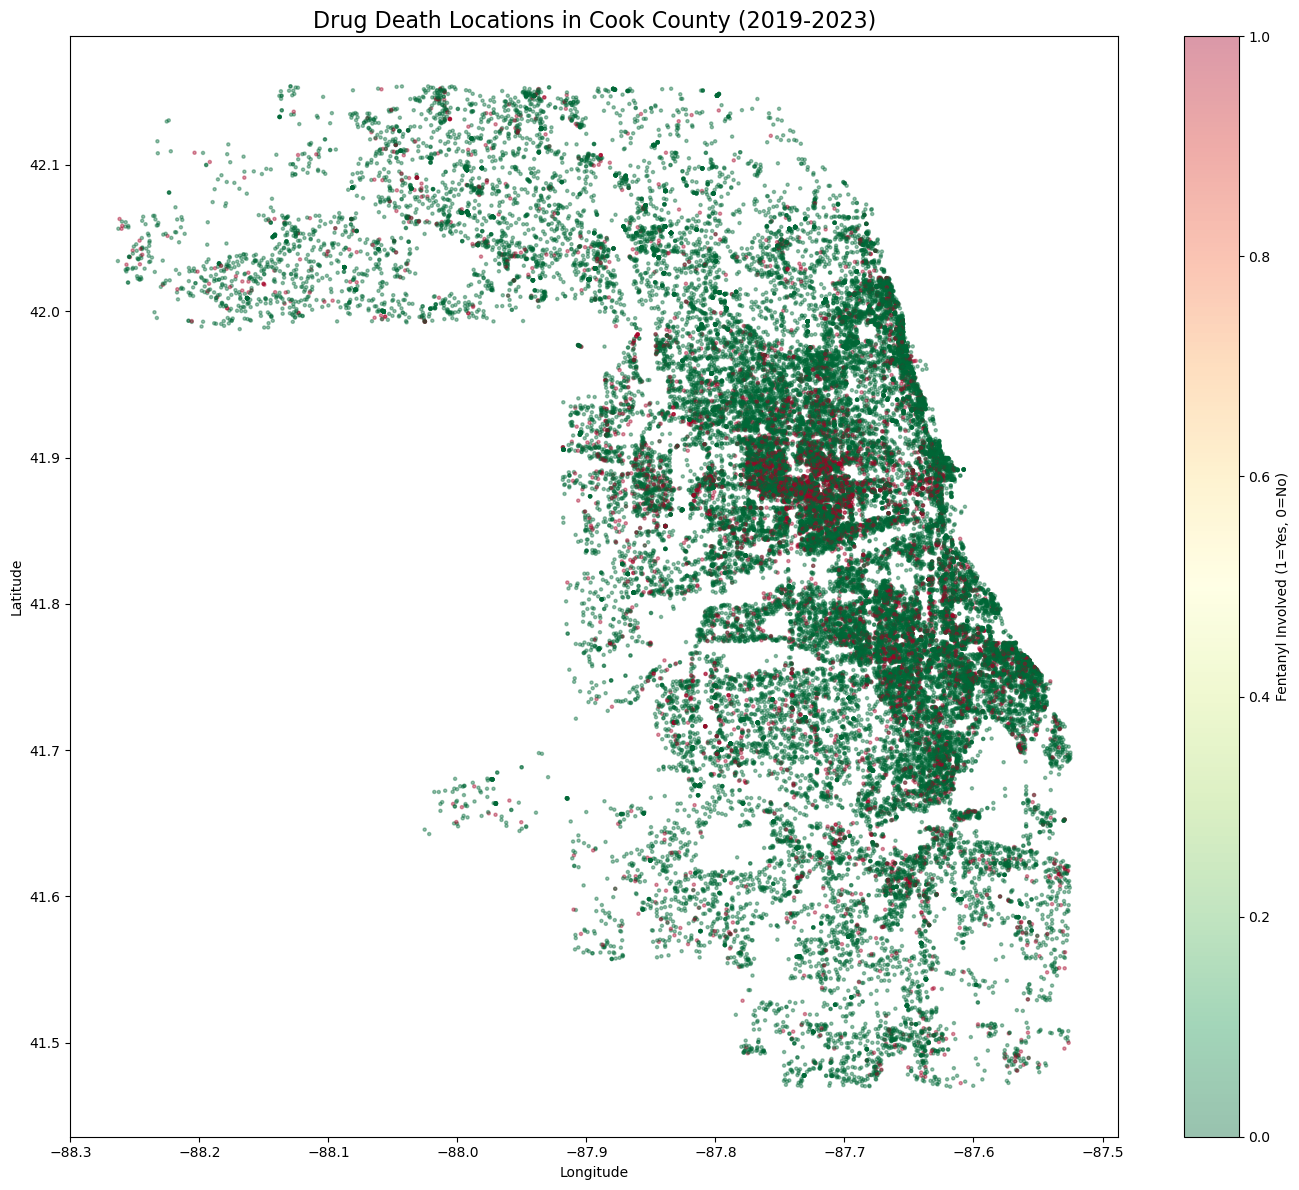

In [66]:
import matplotlib.pyplot as plt

# Filter to rows with coordinates
df_mapped = df.dropna(subset=['latitude', 'longitude'])

plt.figure(figsize=(14, 12))
plt.scatter(df_mapped['longitude'], 
            df_mapped['latitude'],
            c=df_mapped['contains_fentanyl'],
            cmap='RdYlGn_r',  # Red for fentanyl, green for no fentanyl
            alpha=0.4,
            s=5)
plt.colorbar(label='Fentanyl Involved (1=Yes, 0=No)')
plt.title('Drug Death Locations in Cook County (2019-2023)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

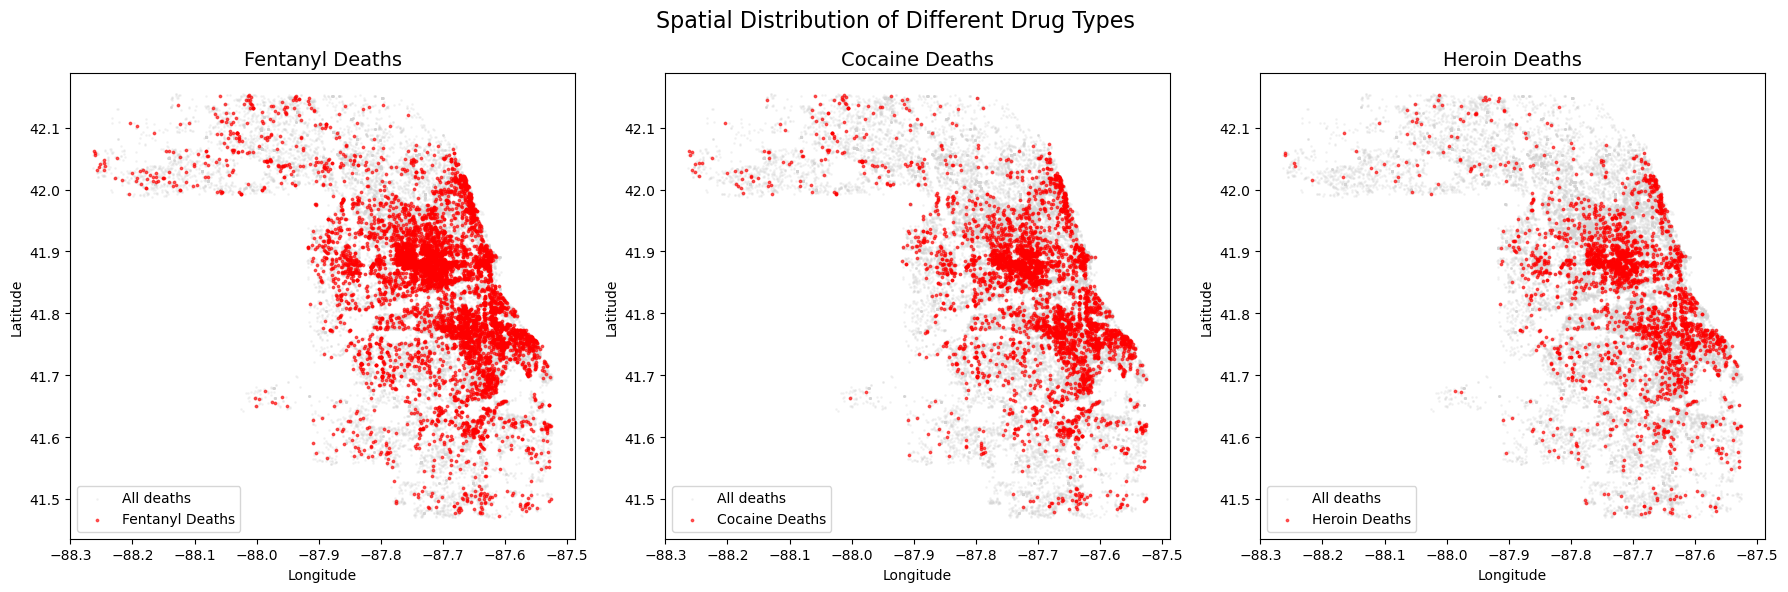

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

drugs = ['contains_fentanyl', 'contains_cocaine', 'contains_heroin']
titles = ['Fentanyl Deaths', 'Cocaine Deaths', 'Heroin Deaths']

for ax, drug, title in zip(axes, drugs, titles):
    drug_deaths = df_mapped[df_mapped[drug] == True]
    
    ax.scatter(df_mapped['longitude'], df_mapped['latitude'],
               c='lightgray', s=1, alpha=0.2, label='All deaths')
    ax.scatter(drug_deaths['longitude'], drug_deaths['latitude'],
               c='red', s=3, alpha=0.6, label=title)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()

plt.suptitle('Spatial Distribution of Different Drug Types', fontsize=16)
plt.tight_layout()
plt.show()

In [68]:
import folium
from folium.plugins import HeatMap, MarkerCluster

# Create map centered on Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11, tiles='OpenStreetMap')

# Add fentanyl deaths as heatmap (red)
fentanyl_data = df_mapped[df_mapped['contains_fentanyl'] == True][['latitude', 'longitude']].values.tolist()
HeatMap(fentanyl_data, radius=10, blur=15, max_zoom=13, name='Fentanyl Deaths').add_to(m)

# Add cocaine deaths as different color (blue/cyan)
cocaine_data = df_mapped[df_mapped['contains_cocaine'] == True][['latitude', 'longitude']].values.tolist()
HeatMap(cocaine_data, radius=10, blur=15, gradient={0.4: 'blue', 0.6: 'cyan', 1: 'lime'}, name='Cocaine Deaths').add_to(m)

# Add heroin deaths as different color (purple/magenta)
heroin_data = df_mapped[df_mapped['contains_heroin'] == True][['latitude', 'longitude']].values.tolist()
HeatMap(heroin_data, radius=10, blur=15, gradient={0.4: 'purple', 0.6: 'magenta', 1: 'pink'}, name='Heroin Deaths').add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Display in notebook (just put m as the last line)
m